In [48]:
import numpy as np
import pandas as pd
from patsy import dmatrix
from matplotlib import pyplot as plt


# Data generation

In [42]:
def df_gen(epoch_p, time_p, cat_p, count_p=None, noise_p=(0,0)):
    ''' Parameters:
        epoch_p: tuple,int
            (start,stop) epoch index range
        time_p: tuple,int
            (start,stop,step) time point range
        cat_p: list of tuples [(b0,b1),...,(b0,b1)]
            cat_p[i] gives time dependent of i-th level of categorical data
        count_p: tuple, float
            (start,stop)
        noise_p: (i,j) tuple,float
            additive random noise with normal mean i and sd j
    '''
    # parsing out the information from given
    e_start,e_stop = epoch_p 
    num_epoch = e_stop-e_start
    t_start,t_stop,t_step = time_p
    mean,sd = noise_p
    cat_length = len(cat_p)
    
    df = pd.DataFrame()

    # generating the time index
    time_length = len([x for x in range(t_start,t_stop,t_step)])
    time = cat_length*(num_epoch*[x for x in range(t_start,t_stop,t_step)])
    df['Time'] = time
    
    # generating epoch index
    epoch_idx = np.asarray([np.tile(x,time_length*cat_length) 
                            for x in range(num_epoch)])
    epoch_idx = np.concatenate(epoch_idx)
    df['epoch_idx'] = epoch_idx
    
    # generating id index
    df['Index'] = np.tile('id_10001',num_epoch*time_length*cat_length)
    
    # generating cat index
    cat = None
    cat = np.asarray(num_epoch*[np.tile('L_'+str(i)+'_'+str(j),time_length) 
                            for i,j in cat_p])
    cat = np.concatenate(cat)
#     print(len(cat))
    df['cat']=cat
    
    # generating actual data
    data = []
    for e in range(num_epoch):
        for c in cat_p:
            b0 = c[0]
            b1 = c[1]
            data_slice = None
            data_slice = [b0 + (b1*x) + np.random.normal(loc=mean,scale=sd) 
                          for x in range(t_start,t_stop,t_step)]
            data.append(data_slice)
    data = np.concatenate((data))
#     print(data)
#     print(len(df.index))
#     print(time_p,len(data_slice),len(data))
    df.set_index(['Index','Time'], inplace=True)
    df['data'] = data
    return df

epoch_idx    cat      data
Index    Time                            
id_10001 0             0  L_1_1  0.931714
         1             0  L_1_1  2.104767
         2             0  L_1_1  3.056587
         0             0  L_2_3  2.005279
         1             0  L_2_3  4.921010
         2             0  L_2_3  7.904651
         0             1  L_1_1  1.042072
         1             1  L_1_1  2.052980
         2             1  L_1_1  3.083562
         0             1  L_2_3  2.114514
         1             1  L_2_3  4.998312
         2             1  L_2_3  8.045354
         0             2  L_1_1  0.988959
         1             2  L_1_1  1.904491
         2             2  L_1_1  3.120025
         0             2  L_2_3  1.919499
         1             2  L_2_3  5.071076
         2             2  L_2_3  8.025699

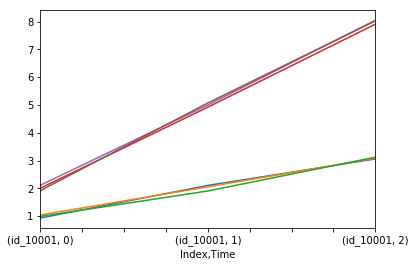

In [47]:
epoch_p = (0,3)
time_p = (0,3,1)
cat_p = [(1,1),(2,3)]
df = df_gen(epoch_p = epoch_p, time_p = time_p, cat_p = cat_p, noise_p=(0,.1))
# df.sort_index(inplace = True)
df.groupby(['cat', 'epoch_idx'])['data'].plot()
df

# OLS 

In [49]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import OLS
import statsmodels.formula.api as smf

In [ ]:
lm1 = smf

In [51]:
lm1 = smf.ols('data ~ 1 + cat', data = df)
print(lm1.fit().params)
print('R-squared: {0}'.format(lm1.fit().rsquared))


Intercept       2.031684
cat[T.L_2_3]    2.968915
dtype: float64
R-squared: 0.39678497171474847


In [79]:
lm1.fit().fittedvalues

Index     Time
id_10001  0       2.031684
          1       2.031684
          2       2.031684
          0       5.000599
          1       5.000599
          2       5.000599
          0       2.031684
          1       2.031684
          2       2.031684
          0       5.000599
          1       5.000599
          2       5.000599
          0       2.031684
          1       2.031684
          2       2.031684
          0       5.000599
          1       5.000599
          2       5.000599
dtype: float64

Time
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
2    Axes(0.125,0.125;0.775x0.755)
dtype: object

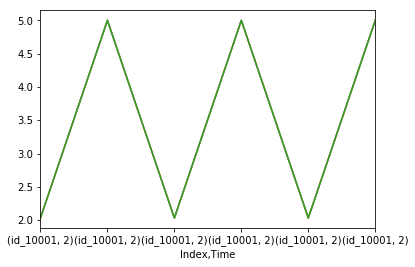

In [77]:
lm1.fit().fittedvalues.groupby('Time').plot()

ValueError: setting an array element with a sequence.

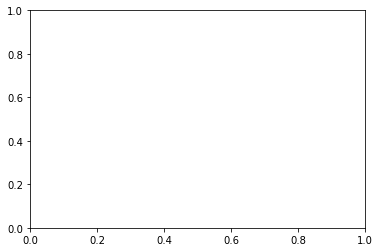

In [67]:
plt.show(plt.plot(lm1.fit().fittedvalues))